In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
!pip install opencv-python
!pip install ultralytics
!pip install moviepy

In [ ]:
!pip list

In [54]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from moviepy.editor import VideoFileClip

**Choose your model**

The yolov10x.pt model was pre-trained on the COCO dataset.

Sources
1. github.com/roboflow/notebooks/blob/main/notebooks/train-yolov10-object-detection-on-custom-dataset.ipynb
2. www.kaggle.com/code/cubeai/yolov10-pretrained-models
3. docs.ultralytics.com/models/yolov10/
4. blog.roboflow.com/yolov10-how-to-train/
5. github.com/THU-MIG/yolov10


In [55]:
model = YOLO("yolov10x.pt")

**Function to predict and detect objects in images and videos**

1. First function that performs object detection on an image using a specified model and optional filtering criteria.
2. Second function that performs object detection and draws bounding boxes with labels around detected objects in an image.
3. the last function sets up a video writer object to save processed video frames to a new video file using OpenCV

In [56]:
def predict(chosen_model, img, classes=[], conf=0.5):
    if classes:
        results = chosen_model.predict(img, classes=classes, conf=conf)
    else:
        results = chosen_model.predict(img, conf=conf)

    return results

def predict_and_detect(chosen_model, img, classes=[], conf=0.5, rectangle_thickness=2, text_thickness=4):
    results = predict(chosen_model, img, classes, conf=conf)
    for result in results:
        for box in result.boxes:
            cv2.rectangle(img, (int(box.xyxy[0][0]), int(box.xyxy[0][1])),
                          (int(box.xyxy[0][2]), int(box.xyxy[0][3])), (0, 255, 0), rectangle_thickness)
            cv2.putText(img, f"{result.names[int(box.cls[0])]}",
                        (int(box.xyxy[0][0]), int(box.xyxy[0][1]) - 10),
                        cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), text_thickness)
    return img, results

def create_video_writer(video_cap, output_filename):
    frame_width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(video_cap.get(cv2.CAP_PROP_FPS))
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')
    writer = cv2.VideoWriter(output_filename, fourcc, fps, (frame_width, frame_height))
    return writer



**Detecting Objects in Images with YOLOv10**

In [57]:
# read the image
image = cv2.imread("/content/drive/MyDrive/cars.jpg")
result_img, _ = predict_and_detect(model, image, classes=[], conf=0.5)


0: 416x640 8 cars, 4 trucks, 2257.8ms
Speed: 3.5ms preprocess, 2257.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


**Necessary to display images in Google Colab when using OpenCV.**

**Save and Plot the result Image**

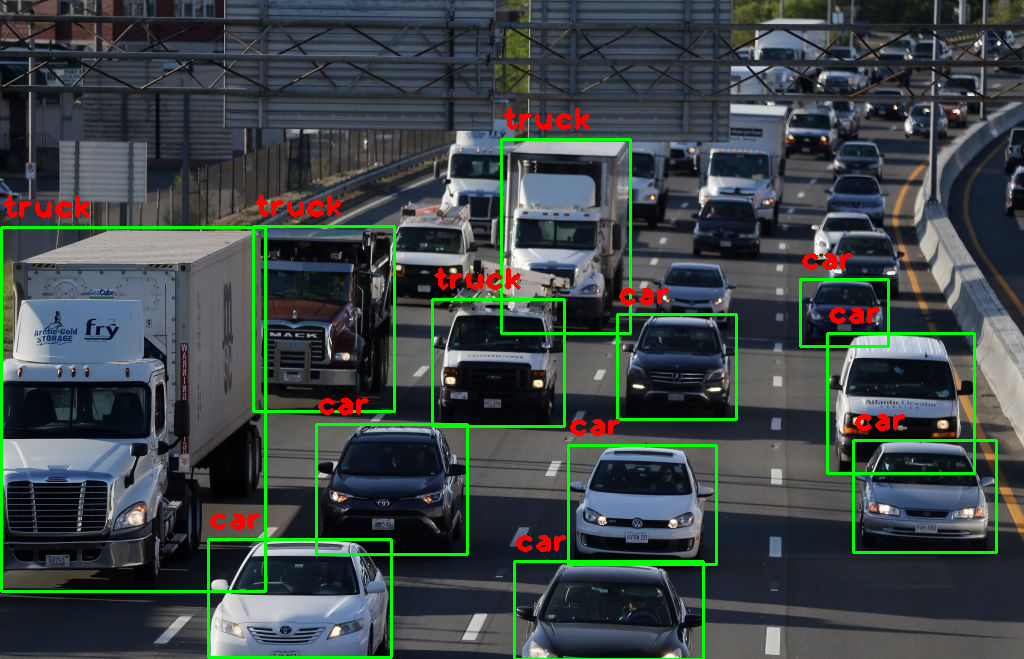

-1

In [59]:
cv2_imshow(result_img)
cv2.imwrite("/content/drive/MyDrive/result.jpg", result_img) # Added a filename with a .jpg extension
cv2.waitKey(0)

**Detecting Objects in Videos with YOLOv10:- reads a video file frame by frame, performs object detection on each frame, and displays the results**

In [60]:
video_path = r"//content/drive/MyDrive/video1.mp4"
cap = cv2.VideoCapture(video_path)
while True:
    success, img = cap.read()
    if not success:
        break
    result_img, _ = predict_and_detect(model, img, classes=[], conf=0.5)
    cv2_imshow(result_img)

    cv2.waitKey(1)

Output hidden; open in https://colab.research.google.com to view.

**Reads a video, performs object detection on each frame, and prepares to save the processed frames to a new video file.**

In [ ]:
video_path = r"//content/drive/MyDrive/video1.mp4"
cap = cv2.VideoCapture(video_path)

# Create VideoWriter object
output_path = r"//content/drive/MyDrive/result_video.mp4"
writer = create_video_writer(cap, output_path)

while True:
    success, img = cap.read()
    if not success:
        break
    result_img, _ = predict_and_detect(model, img, classes=[], conf=0.5)

    # Write the frame to the output video
    writer.write(result_img)

    cv2.waitKey(1)

# Release the VideoCapture and VideoWriter objects
cap.release()
writer.release()

Show the result video

**Loads a video file and displays it in a Google Colab notebook with options for looping and autoplaying.**

In [46]:
clip = VideoFileClip(output_path)
clip.ipython_display(loop=True, autoplay=True)

Output hidden; open in https://colab.research.google.com to view.